# Collaborative Filtering

Collaborative Filtering (CF) is a technique widely used in building recommender systems, a class of systems that predict user preferences for items or products. It's based on the idea that people who agreed in their opinions in the past will agree again in the future. In the context of educational tools, CF can suggest learning tasks to students based on the preferences and behaviors of similar students.

### How Does Collaborative Filtering Work?

1. **User-Item Interactions**: CF relies on user-item interaction data. This could be explicit feedback (like ratings) or implicit indicators (like time spent on a task or number of attempts).

2. **Finding Similarities**: The system identifies patterns in user behavior by comparing the similarities between users or items. For instance, if two students have similar patterns in solving certain types of tasks, they are considered to have similar preferences.

3. **Generating Recommendations**: Based on these similarities, the system predicts how a user might feel about an item (or task) they haven't interacted with. For example, if Student A likes tasks that Student B also likes, then the system might recommend to Student A a task that Student B has interacted with positively.

### Types of Collaborative Filtering

- **User-Based**: Recommendations are made based on the preferences of similar users. It answers the question, "What might this user like, given what similar users like?"

- **Item-Based**: Here, the focus is on the similarity between items. It suggests items similar to what the user has liked before, addressing the question, "What items are similar to the ones this user likes?"

### Application in Education

In an educational setting, CF can personalize the learning experience by recommending tasks that are well-suited to a student's learning style, performance history, and preferences, as inferred from the data of similar students. This approach enhances engagement and learning efficiency, making educational content more relevant and effective for each learner.

# Use-case: Recommending Problems to Students

Let's explore how collaborative filtering can be applied in the context of recommending educational tasks to students, enhancing their learning experience by personalizing the difficulty and type of problems they encounter.

## Understanding the Dataset

This dataset simulates various aspects of student interactions with educational tasks. Each element in the dataset captures a different dimension of these interactions:

### Dataset Elements

1. **StudentID**
   - **Description**: Unique identifier for each student.
   - **Values**: Integer.
   - **Range**: 1 to 100.

2. **ProblemID**
   - **Description**: Unique identifier for each educational task.
   - **Values**: Integer.
   - **Range**: 1 to 50.

3. **Correctness**
   - **Description**: Whether the student's attempt was correct.
   - **Values**: Binary (1 for correct, 0 for incorrect).

4. **TimeSpent**
   - **Description**: Time spent on a task in minutes.
   - **Values**: Integer.
   - **Range**: 1 to 30 minutes.

5. **AttemptCount**
   - **Description**: Number of attempts on a task.
   - **Values**: Integer.
   - **Range**: 1 to 5.

6. **HintUsage**
   - **Description**: Number of hints used for a task.
   - **Values**: Integer.
   - **Range**: 0 to 3.

7. **ProblemDifficulty**
   - **Description**: Difficulty level of the task.
   - **Values**: Categorical ('Easy', 'Medium', 'Hard').

8. **DaysSinceStart**
   - **Description**: Days elapsed since the start of the topic.
   - **Values**: Integer.
   - **Range**: 0 to 30.

### Data Representation and Use

- Each record represents a student's attempt at a specific task, uniquely identified by the `StudentID` and `ProblemID` combination.
- The dataset not only records the outcome (`Correctness`) but also detailed aspects of the learning process, such as `TimeSpent`, `AttemptCount`, and `HintUsage`.
- `ProblemDifficulty` provides insights into the challenge level faced by students, enabling analysis of performance across varying difficulties.
- `DaysSinceStart` helps track the student's progression over time, offering valuable data for understanding learning patterns and habits.

This dataset serves as a robust foundation for creating a recommender system that can tailor learning experiences to individual student needs, significantly enhancing the educational process.

> **Note** The dataset is generated with random simulations, so while the individual results might not reflect real-world scenarios, the methodology and approach serve as a valuable demonstration of the capabilities of collaborative filtering in educational settings.

In [1]:
import numpy as np
import pandas as pd

# Load the dataset
csv_file_path = 'data/educational_recommender_data.csv'
df = pd.read_csv(csv_file_path)

# Display the first few rows of the dataframe
df.head()

,StudentID,ProblemID,Correctness,TimeSpent,AttemptCount,HintUsage,ProblemDifficulty,DaysSinceStart
0,1,249,0,10.401730,3,3,Medium,6
1,1,132,0,19.812038,5,3,Hard,2
2,1,216,0,18.413869,5,2,Hard,3
3,1,192,0,12.314414,2,1,Hard,21
4,1,149,0,9.764619,3,0,Medium,14


## User-Based Problem: Difficulty Level Adjustment in Educational Recommender Systems

### Objective

We aim to develop a user-based collaborative filtering recommender system that dynamically adjusts the difficulty of educational tasks for individual students. This system's goal is to analyze student interaction data and offer personalized task difficulty recommendations.

### Key Challenge

- **Personalized Learning Path**: The challenge lies in catering to each student's unique learning curve. By interpreting their performance data, the system should recommend tasks that are appropriately challenging and align with their educational growth trajectory.

### Data Utilization

- **Dataset Overview**: The dataset comprises elements like `StudentID`, `ProblemID`, `Correctness`, `TimeSpent`, `AttemptCount`, `HintUsage`, `ProblemDifficulty`, and `DaysSinceStart`.
- **Analysis Focus Points**:
  - **Performance Metrics**: The system uses metrics like `Correctness`, `TimeSpent`, `AttemptCount`, and `DaysSinceStart` to assess how students interact with tasks of varying difficulty and to track their progress over time.
  - **Task Difficulty Assessment**: Evaluating students' performance against tasks of different difficulty levels and identifying patterns of learning progression.

### Collaborative Filtering Approach

- **User-Based Methodology**:
  - Identifying students with similar learning behaviors and progression patterns.
  - Analyzing how these students evolve in their ability to tackle increasingly challenging tasks.
  - Recommending tasks of varying difficulty based on the aggregated performance and progression trends of similar students.

### Expected Outcome

- **Adaptive Learning Experience**: The system aims to propose tasks that match each student's current skill level, gently pushing their boundaries to foster continuous learning and development.
- **Enhanced Educational Engagement**: By offering tasks that are optimally challenging and considering the most suitable timing for these tasks, the system seeks to maintain high levels of student engagement and motivation.

### Significance

This personalized approach to adjusting task difficulty is crucial in educational settings. It ensures that students face challenges tailored to their individual learning abilities and context. The system is designed to understand a student's current standing in their learning journey and consider their recent interactions to predict the most beneficial next steps in their educational path. This method is vital for providing an educational experience that is both effective and deeply personalized.

## Choosing the Right Method for Our Recommender System

In building our recommender system for adjusting the difficulty level of educational tasks, it's crucial to select the most suitable method. Let's discuss the two primary categories: memory-based and model-based methods, to determine the best fit for our task.

### Memory-Based Methods (Neighborhood-Based)

Memory-based methods, including user-based and item-based collaborative filtering, rely on computing similarities between users or items based on their interaction histories.

- **Advantages**:
  - **Interpretability**: These methods are easy to understand and implement. They provide clear insights into why a recommendation is made.
  - **Dynamic Recommendations**: Directly use the latest user-item interactions, making them inherently dynamic.

- **Challenges**:
  - **Scalability Issues**: As the dataset grows, these methods can become computationally expensive due to the need to compute all pairwise similarities.
  - **Data Sparsity**: They can struggle in scenarios where each user interacts with only a small subset of the total items.

### Model-Based Methods

Model-based methods involve constructing predictive models, often utilizing machine learning algorithms, to make recommendations.

- **Advantages**:
  - **Efficiency at Scale**: More scalable than memory-based methods as they do not require computing and storing all user-item similarities.
  - **Better Handling of Sparsity**: Capable of dealing with sparse datasets by uncovering latent factors that explain observed interactions.
  - **Integration of Diverse Data**: Can incorporate various data types, including temporal patterns, for more nuanced recommendations.

- **Challenges**:
  - **Complex Implementation**: Generally more complex to set up and require careful tuning.
  - **Interpretability**: Often less interpretable than memory-based methods, making it harder to understand the reasoning behind specific recommendations.

### Our Approach: Model-Based Method

Given the nature of our task – adjusting the difficulty level of educational tasks based on student performance and learning progress over time – a model-based approach is likely more suitable due to:

- **Temporal Data Integration**: Capable of effectively integrating the `DaysSinceStart` feature, which is crucial for understanding the progression of student learning.
- **Complex Pattern Recognition**: Can uncover complex relationships within the data, essential for understanding diverse learning behaviors.
- **Scalability and Sparsity Management**: Ideal for our potentially large and sparse educational datasets.

# LightFM Approach for Difficulty Level Adjustment

In this section of the tutorial, we will utilize the [LightFM](https://github.com/lyst/lightfm) library to construct a recommender system aimed at adjusting the difficulty level of educational tasks. The process includes steps for data preprocessing, model development, training, and evaluation.

## Step 1: Install LightFM

Before proceeding, ensure that LightFM is installed in your Python environment. It can be installed using pip:

```python
!pip install lightfm
```

## Step 2: Preprocess the Data

Effective data preprocessing is crucial for the success of any machine learning model. In our case, LightFM works with categorical data, so our dataset should actually work seamlessly as is..

## Step 3: Create a LightFM Dataset

This step involves creating a specialized LightFM dataset, a critical prerequisite for utilizing the LightFM library. This dataset format helps in structuring and managing user-item interaction data, along with integrating additional influential features for the recommender system. Here's an overview of the process:

### Understanding LightFM Datasets

- **LightFM Dataset Structure**: This format is tailored for handling interaction data between users (students) and items (educational tasks), along with associated features. It's essential for the model to comprehend and process this data to generate recommendations.

### Preparing and Fitting the Dataset

- **Fitting the Dataset**: 'Fitting' refers to the process of acquainting the dataset with the entire spectrum of users, items, and item feature values. This step essentially sets up the dataset by defining the scope of users (students), items (tasks), and their characteristics.
- **Purpose of Fitting**: The fitting process equips LightFM with a comprehensive understanding of the data's structure, encompassing all potential users, items, and their features. This understanding is crucial for the model to establish internal mappings and indexes, enhancing its ability to analyze and process the data efficiently.

### Implementation Details

- In our scenario, the LightFM dataset will be configured with `StudentID` as users and `ProblemID` as items.
- Additional features such as `ProblemDifficulty`, encoded numerically, and `DaysSinceStart` will be incorporated to enrich the model's context and improve recommendation quality.

> **Note** In the context of LightFM, all feature values are handled as string identifiers. Therefore, numerical features in our dataset will be appropriately converted to string format to align with LightFM's requirements.

In [2]:
from lightfm.data import Dataset

# Initialize a new Dataset object
dataset = Dataset()

# Fit the dataset with users, items, and item features
dataset.fit(
    (row['StudentID'] for _, row in df.iterrows()),
    (row['ProblemID'] for _, row in df.iterrows()),
    user_features=(str(row['DaysSinceStart']) for _, row in df.iterrows()),
    item_features=(row['ProblemDifficulty'] for _, row in df.iterrows())
)


### Understanding `dataset.build_interactions` in LightFM

The `dataset.build_interactions` function in LightFM is crucial for preparing our data for the recommender system. It processes each user-item pair along with a weighting (in our case, `Correctness`) to create two matrices: `interactions` and `weights`.

> `Correctness` provides a direct measure of a student's success with a task, making it a meaningful indicator of student engagement and understanding. However, depending on the desired outcome, using `TimeSpent`, `AttemptCount`, etc. (or even a combination of multiple metrics) could be a more effective weighting for each interaction.

#### The `interactions` Matrix
- **Purpose**: Represents whether a user has interacted with an item.
- **Structure**: A binary (0 or 1), sparse matrix with users as rows and items as columns.
- **Values**: 
  - **1**: Interaction occurred (student attempted a task).
  - **0**: No interaction.

#### The `weights` Matrix
- **Purpose**: Quantifies the strength or confidence of each interaction.
- **Structure**: Mirrors the `interactions` matrix but with numerical values.
- **Values**: Represents interaction intensity. In our context, `Correctness` is used as the weight, indicating the student's performance on the task.

#### Usage in the Model
- **Interactions Matrix**: Trains the model on which tasks are attempted by students.
- **Weights Matrix**: Prioritizes interactions based on student performance, influencing the model to focus more on tasks where the student's performance is indicative of their learning needs and preferences.

In [3]:
# Building the interactions matrix
(interactions, weights) = dataset.build_interactions(
    ((row['StudentID'], row['ProblemID'], row['Correctness']) for _, row in df.iterrows())
)

## Step 4: Building Item and User Features in LightFM

This step is pivotal in enriching our LightFM dataset, as we add both item and user features. These features infuse the model with contextual details about educational tasks and student interactions, which are essential for generating well-informed recommendations.

### Enhancing Model Context with Features

- **Item Features - Task Characteristics**: The `ProblemDifficulty` feature captures the inherent challenge level of each task, providing vital information to the model about the nature of the problems.
- **User Features - Temporal Aspect**: Unlike traditional models, we also incorporate a temporal dimension through `DaysSinceStart` as a user feature. This unique approach considers the progression of students over time, offering a dynamic perspective on their learning journey.

### Implementation in LightFM

**Building Item Features**: We define features related to each educational task, such as the difficulty level, to give the model a deeper understanding of each problem's attributes.

In [4]:
# Building item features
item_features = dataset.build_item_features(
    (row['ProblemID'], [row['ProblemDifficulty']]) for _, row in df.iterrows()
)

**Building User Features**: By including `DaysSinceStart` as a user feature, we add a layer of temporal context, enabling the model to tailor recommendations based on how far a student has progressed since the start of the learning period.

In [5]:
# Building user features
user_features = dataset.build_user_features(
    (row['StudentID'], [str(row['DaysSinceStart'])]) for _, row in df.iterrows()
)

### Balancing Complexity and Utility

- **Simplified yet Effective**: While it's possible to delve into more granular temporal details, our model strikes a balance by simplifying the temporal aspect without sacrificing the core utility. This approach ensures that the model remains robust yet practical for real-world educational settings.

## Step 5: Model Creation and Training with LightFM

Now we proceed to a pivotal phase—creating and training our recommendation model using LightFM. This step is crucial as it involves fine-tuning the model's parameters and harnessing our dataset for training purposes.

### Understanding the LightFM Model

- **The LightFM Framework**: LightFM is a versatile matrix factorization model that merges aspects of collaborative filtering and content-based approaches. It's adept at handling both implicit and explicit feedback datasets, making it a prime choice for a wide range of recommendation tasks.

- **Key Components of the Model**:
  - **`no_components`**: Represents the number of latent factors (or features) in the model, which correspond to the dimensions of the user and item embeddings. Selecting an optimal number of components is crucial; too few may underfit, while too many could lead to overfitting.
  - **`loss`**: This specifies the loss function used for training. We're using 'warp' (Weighted Approximate-Rank Pairwise) here, a robust choice for datasets with implicit feedback, as it focuses on optimizing the order of recommendations.
- **`learning_rate`**: Sets the speed at which the model updates its parameters during training. A balanced learning rate (0.6 in our case) is crucial for effective learning without overshooting or slow convergence.
- **`learning_schedule`**: LightFM employs 'adagrad' as its default learning schedule. This approach adapts the learning rate over time, allowing for an automatic decay. The adaptive nature of 'adagrad' makes the learning process more responsive to the data, enhancing the model's ability to converge to an optimal solution efficiently.

In [6]:
from lightfm import LightFM

# Create the model
model = LightFM(no_components=30, loss='warp', learning_rate=0.5, learning_schedule='adagrad')

### Training Process

The training process involves using the LightFM model's `fit` method, where the model is trained to predict the `Correctness` of user-item interactions. This process is enhanced by considering the interaction weights, which add an additional layer of depth to the learning.

#### Key Aspects of the Training:

- **Fit the Model**: The `fit` method trains the model on our dataset. It learns to predict the `Correctness` of user-item pairs, considering both the interaction patterns and the additional item features we provided.
- **Incorporating Weights**: The training utilizes the `weights` matrix generated during the creation of interactions. This matrix provides a nuanced view of each interaction, allowing the model to weigh the interactions differently based on their strength or importance.
- **Epochs and Overfitting**: Training runs for a specified number of epochs. Each epoch is an iteration over the entire dataset. More epochs can improve the model's accuracy but also pose a risk of overfitting.
- **Parallel Computation**: The `num_threads` parameter is used to specify the number of parallel computation threads, optimizing the training time.
- **Tracking progress**: We will track the training progress by calcualting the Area Under the ROC Curve (AUC) at the end of each epoch. The AUC is a performance metric used to evaluate the quality of the model's predictions. In the context of LightFM, a higher AUC score indicates better model performance.

In [7]:
from lightfm.evaluation import auc_score

# Number of epochs to train
num_epochs = 400

# Initialize list to store AUC scores
auc_scores = []

# Training loop
for epoch in range(num_epochs):
    # Update the model for one more epoch
    model.fit_partial(interactions, item_features=item_features, user_features=user_features, 
                      sample_weight=weights, epochs=1, num_threads=2)
    # Calculate and store the AUC score
    score = auc_score(model, interactions, item_features=item_features, user_features=user_features).mean()

    auc_scores.append(score)

Display the training progress:

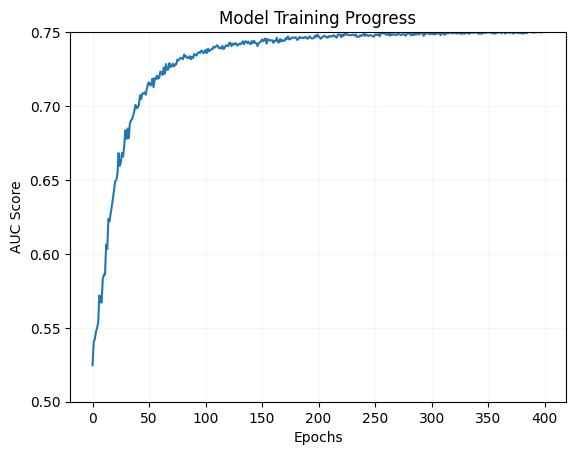

In [8]:
import matplotlib.pyplot as plt

# Plotting AUC scores over epochs
plt.plot(auc_scores)
plt.ylim(0.5,0.75)
plt.xlabel('Epochs')
plt.ylabel('AUC Score')
plt.title('Model Training Progress')
plt.grid(alpha=0.1)
plt.show()

### Outcome

After training, the model will be able to predict how likely a student is to correctly solve a task, given the student's past interactions and the features of the tasks. These predictions can then be used to recommend appropriate difficulty levels of tasks to students, enhancing their learning experience.

## Step 6: Model Evaluation and Generating Task Recommendations

Having trained our LightFM model, we proceed to evaluate its effectiveness in predicting task completion success and use it to generate personalized task recommendations.

### Model Evaluation

For evaluating the model, we employ the `precision_at_k` metric. This metric can be used to assess how accurately the model predicts tasks that a student is likely to complete successfully.

- **`precision_at_k`**:
  - **Purpose**: Measures the model's precision in recommending the top `k` tasks. Specifically, it evaluates whether the tasks predicted as likely to be completed successfully by the student (based on the model's scoring) are indeed among those that the student has successfully completed in the past.
  - **Calculation**: It calculates the proportion of recommended tasks in the top `k` that were actually completed successfully by the student.
  - **Meaning**: A higher `precision_at_k` score indicates that the model is effectively identifying tasks that align with the student's ability to complete them successfully.

In [9]:
from lightfm.evaluation import precision_at_k

# Evaluate the model's precision
train_precision = precision_at_k(model, interactions, 
                                 item_features=item_features, user_features=user_features, k=5).mean()

print(f'Train Precision at k=5: {train_precision}')

Train Precision at k=5: 0.9520000219345093


### Generating Task Recommendations

To generate personalized task recommendations for a specific student, we utilize the `predict` method in LightFM:

- **`predict` Method**: This function calculates the likelihood scores for all tasks for a given student. These scores reflect the model's confidence in how well the student might perform on each task, based on their past performance and the task's characteristics.
- **Task Ranking**: Using `np.argsort`, we rank the tasks based on their predicted scores. This ranking helps us identify which tasks the model believes the student is most likely to complete successfully.
- **Mapping Indices**: `dataset.mapping()` is used to translate the internal indices of the LightFM dataset back to the original task IDs. This conversion is necessary to identify the actual tasks corresponding to the model's predictions.
- **Selecting the Optimal Challenge**: Among the top-ranked tasks, we identify the task with the highest difficulty level. This approach ensures that the recommendation not only aligns with the student's ability but also offers an appropriate level of challenge to facilitate learning progression.

This methodology for generating recommendations aims to strike a balance between matching the student's current skill level and providing an opportunity for growth by introducing them to tasks that are suitably challenging.

> **Note** While this recommender system serves as a foundational example, it is relatively basic in its approach. In a real-world educational context, a more sophisticated and comprehensive system would be necessary. Such a system would ideally factor in a wider range of student-specific variables and learning analytics to accurately recommend the most beneficial next activity for each student's individual learning journey.

In [10]:
def recommend_for_student(student_id, days_since_start, model, df, fixed_threshold=0.9):
    # Mapping student_id to internal index used by the model
    student_idx = dataset.mapping()[0][student_id]

    # Identifying tasks already completed by the student to avoid re-recommendation
    completed_tasks_ids = df[df['StudentID'] == student_id]['ProblemID'].unique()
    completed_tasks_indices = [dataset.mapping()[2].get(task_id) for task_id in completed_tasks_ids]

    # Building user features using the provided days_since_start
    user_features = dataset.build_user_features([(student_id, [str(days_since_start)])])

    # Predicting scores for all tasks
    all_tasks = np.arange(interactions.shape[1])
    scores = model.predict(student_idx, all_tasks, item_features=item_features, user_features=user_features)

    # Normalizing scores to a [0, 1] range for consistent thresholding
    min_score, max_score = min(scores), max(scores)
    normalized_scores = (scores - min_score) / (max_score - min_score) if max_score > min_score else scores

    # Filtering tasks based on the normalized score threshold
    filtered_tasks = [(score, task) for score, task in zip(normalized_scores, all_tasks) 
                      if score > fixed_threshold and task not in completed_tasks_indices]
    filtered_tasks.sort(reverse=True)

    # Attempt to recommend a 'Hard' task first, then a 'Medium' task if no 'Hard' tasks meet the criteria
    for difficulty in ['Hard', 'Medium']:
        for _, task_index in filtered_tasks:
            task_id = dataset.mapping()[2][task_index]
            task_difficulty = df[df['ProblemID'] == task_id]['ProblemDifficulty'].iloc[0]
            
            if task_difficulty == difficulty:
                return task_id, task_difficulty

    # Default to the highest-scoring task if no 'Hard' or 'Medium' tasks meet the criteria
    highest_scoring_task = dataset.mapping()[2][filtered_tasks[0][1]]
    task_difficulty = df[df['ProblemID'] == highest_scoring_task]['ProblemDifficulty'].iloc[0]
    return highest_scoring_task, task_difficulty

# Example usage
student_id = 1
days_since_start = 25
recommended_task, task_difficulty = recommend_for_student(student_id, days_since_start, model, df)
print(f"Recommended Task for Student {student_id} at {days_since_start} days since start: Task {recommended_task}, Difficulty: {task_difficulty}")

Recommended Task for Student 1 at 25 days since start: Task 9, Difficulty: Hard


### Conclusion

This step completes the end-to-end process of building, training, evaluating, and utilizing a recommender system using LightFM. The model's precision provides an indication of its effectiveness, and the recommendation function can be used to suggest personalized tasks to individual students, enhancing their learning experience.